In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Read data

In [75]:
ellipse = pd.read_csv('FeedForward_Data_ellipse.csv', names=['dim1','dim2','label'])

In [94]:
#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = clf(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
#     plt.savefig(filename)
#     plt.close()

## Part a

In [95]:
X_ellipse = ellipse.values[:, 0:2]  # Take only the first two features.     
X_ellipse = torch.tensor(X_ellipse, dtype = torch.float)   
y_ellipse = ellipse.values[:, 2]
y_ellipse = torch.tensor(y_ellipse, dtype = torch.long)

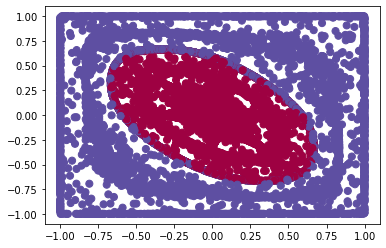

In [96]:
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], c=y_ellipse, cmap=plt.cm.Spectral, s = 50)

In [100]:
class Net_a(nn.Module):
    
    def __init__(self):
        super(Net_a, self).__init__()
        self.fc1 = nn.Linear(2, 30)
        torch.nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        
        self.fc2 = nn.Linear(30, 40)
        torch.nn.init.uniform_(self.fc2.weight, a=-1, b=1)
        
        self.fc3 = nn.Linear(40, 30)
        torch.nn.init.uniform_(self.fc3.weight, a=-1, b=1)
        
        self.fc4 = nn.Linear(30, 30)
        torch.nn.init.uniform_(self.fc4.weight, a=-1, b=1)
        
        self.fc5 = nn.Linear(30, 2)
        torch.nn.init.uniform_(self.fc5.weight, a=-1, b=1)
        
#         self.fc4 = nn.Linear(8, 8)
#         torch.nn.init.uniform_(self.fc4.weight, a=-2, b=2)
        
#         self.fc5 = nn.Linear(8, 2)
#         torch.nn.init.uniform_(self.fc5.weight, a=-2, b=2)
        
#         self.fc6 = nn.Linear(5, 2)
#         torch.nn.init.uniform_(self.fc6.weight, a=0, b=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        #x = F.relu(self.fc5(x))
        x = self.fc5(x)
        return F.log_softmax(x)
        #return F.softmax(x)

In [101]:
previous_loss = 1

#%% train
net_a = Net_a()

# create a stochastic gradient descent optimizer
learning_rate = .01
# optimizer = torch.optim.SGD(net_a.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net_a.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

#Stopping conditions
stopping_crit = np.power(1/10,6)
nepochs = 24000

data, target = X_ellipse, y_ellipse
# run the main training loop
for epoch in range(nepochs):
    #    adjust learning rate if desired
    if epoch % 3000 == 0 and epoch <= 24000:
        for g in optimizer.param_groups:
            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net_a(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net_a(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
#         if accuracy >= 0.92:
#              break

#     if abs(previous_loss - loss.item()) < stopping_crit:
#          break
    
#    previous_loss = copy.copy(loss.item())
    
#%% compute accuracy on training data
net_out = net_a(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

<ipython-input-100-d5bcd96ec271>:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  3.2408158779144287
Training accuracy is  0.33533653846153844
Epoch  100 Loss  0.19736361503601074
Training accuracy is  0.8985126201923077
Epoch  200 Loss  0.192143514752388
Training accuracy is  0.8996394230769231
Epoch  300 Loss  0.18884164094924927
Training accuracy is  0.9000150240384616
Epoch  400 Loss  0.1918734461069107
Training accuracy is  0.8992638221153846
Epoch  500 Loss  0.18668796122074127
Training accuracy is  0.900390625
Epoch  600 Loss  0.18472279608249664
Training accuracy is  0.900390625
Epoch  700 Loss  0.18419808149337769
Training accuracy is  0.9030949519230769
Epoch  800 Loss  0.19480684399604797
Training accuracy is  0.9200721153846154
Epoch  900 Loss  0.18054205179214478
Training accuracy is  0.900390625
Epoch  1000 Loss  0.17918674647808075
Training accuracy is  0.9010667067307693
Epoch  1100 Loss  0.1937064826488495
Training accuracy is  0.8995643028846154
Epoch  1200 Loss  0.18210962414741516
Training accuracy is  0.9005408653846154
Epoch  130

Epoch  10600 Loss  0.075455442070961
Training accuracy is  0.9830979567307693
Epoch  10700 Loss  0.07437175512313843
Training accuracy is  0.9823467548076923
Epoch  10800 Loss  0.0833704024553299
Training accuracy is  0.9560546875
Epoch  10900 Loss  0.07402820140123367
Training accuracy is  0.9830979567307693
Epoch  11000 Loss  0.07318689674139023
Training accuracy is  0.978515625
Epoch  11100 Loss  0.07276488095521927
Training accuracy is  0.978515625
Epoch  11200 Loss  0.07195749878883362
Training accuracy is  0.9817457932692307
Epoch  11300 Loss  0.08383950591087341
Training accuracy is  0.9558293269230769
Epoch  11400 Loss  0.07269441336393356
Training accuracy is  0.9755859375
Epoch  11500 Loss  0.07067941874265671
Training accuracy is  0.9817457932692307
Epoch  11600 Loss  0.07023438811302185
Training accuracy is  0.9821213942307693
Epoch  11700 Loss  0.07058750838041306
Training accuracy is  0.9794921875
Epoch  11800 Loss  0.07826905697584152
Training accuracy is  0.979642427884

Epoch  21000 Loss  0.05073491483926773
Training accuracy is  0.9861778846153846
Epoch  21100 Loss  0.05064409226179123
Training accuracy is  0.9862530048076923
Epoch  21200 Loss  0.05057554692029953
Training accuracy is  0.9862530048076923
Epoch  21300 Loss  0.05050485581159592
Training accuracy is  0.986328125
Epoch  21400 Loss  0.05043236166238785
Training accuracy is  0.9861778846153846
Epoch  21500 Loss  0.05035674571990967
Training accuracy is  0.9862530048076923
Epoch  21600 Loss  0.050277769565582275
Training accuracy is  0.986328125
Epoch  21700 Loss  0.05019809305667877
Training accuracy is  0.986328125
Epoch  21800 Loss  0.050115957856178284
Training accuracy is  0.986328125
Epoch  21900 Loss  0.05003084987401962
Training accuracy is  0.9862530048076923
Epoch  22000 Loss  0.049943532794713974
Training accuracy is  0.9864032451923077
Epoch  22100 Loss  0.04985559731721878
Training accuracy is  0.986328125
Epoch  22200 Loss  0.049773041158914566
Training accuracy is  0.98625300

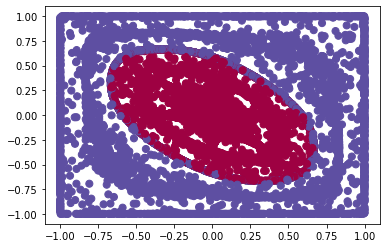

In [102]:
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

<ipython-input-100-d5bcd96ec271>:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


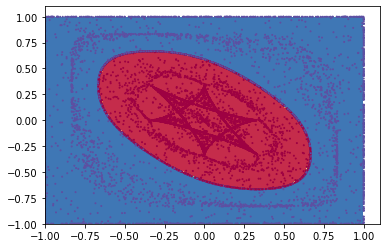

In [103]:
plot_decision_boundary(net_a, X_ellipse, y_ellipse)

In [104]:
print(net_a.fc1.weight)
print(net_a.fc2.weight)
print(net_a.fc3.weight)
print(net_a.fc4.weight)
print(net_a.fc5.weight)

Parameter containing:
tensor([[-0.7946, -0.2436],
        [-0.3493,  0.8586],
        [-1.0750, -0.3004],
        [-1.0436,  0.4947],
        [-0.1772,  0.6386],
        [ 0.1277, -0.6014],
        [-0.4896, -0.9023],
        [ 0.1743, -0.0873],
        [ 0.0581, -0.5197],
        [ 0.0280,  1.0360],
        [ 0.5512, -0.6818],
        [ 0.5305,  0.9038],
        [ 1.1430, -0.9737],
        [-0.9651, -0.0564],
        [-0.0033,  0.7111],
        [ 0.9394, -0.1063],
        [-0.0545, -0.1094],
        [ 0.2377,  0.5379],
        [ 0.7646,  0.0409],
        [ 0.8288,  0.3622],
        [-0.5395, -0.7478],
        [ 0.3366,  0.0292],
        [-0.7434, -0.7083],
        [-0.8587, -0.0999],
        [ 0.2596,  0.6445],
        [ 0.3121, -0.6417],
        [ 0.8221, -0.0295],
        [-0.4366,  0.6331],
        [ 0.5832,  0.5645],
        [-0.0290,  0.2573]], requires_grad=True)
Parameter containing:
tensor([[ 0.2660, -0.0563, -0.0500,  ..., -0.4551,  0.5525, -0.7370],
        [-0.7555, -0.0235